## Neural network classification with one hidden layer

 

You will learn how to:

    Implement a 2-class classification neural network with a single hidden layer
    Use units with a non-linear activation function, such as tanh
    Compute the cross entropy loss
    Implement forward and backward propagation



#### 1 - Packages

Let's first import all the packages that you will need during this assignment.

numpy is the fundamental package for scientific computing with Python.
sklearn provides simple and efficient tools for data mining and data analysis.
matplotlib is a library for plotting graphs in Python.
testCases provides some test examples to assess the correctness of your functions
planar_utils provide various useful functions used in this assignment

In [42]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

#### 2 - Dataset

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables X and Y.

In [43]:
X, Y = load_planar_dataset()



Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data.

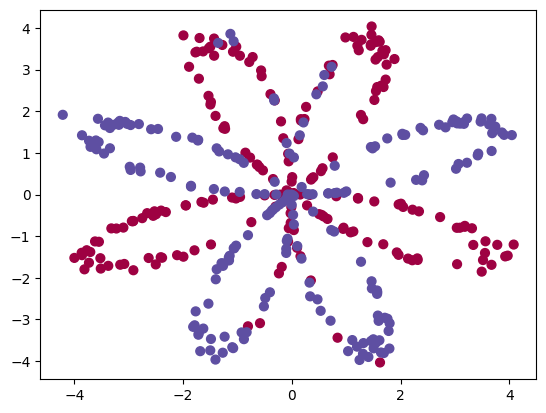

In [44]:

plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

You have:

- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like.

Exercise: How many training examples do you have? In addition, what is the shape of the variables X and Y?

Hint: How do you get the shape of a numpy array? (help)

In [45]:

### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


#### Neural Network model


You are going to train a Neural Network with a single hidden layer.

Here is our model:

Mathematically:

For one example $x^{(i)}$:$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$$$y^{(i)}_{prediction} = \begin{cases} 1 &amp; \mbox{if } a^{[2](i)} &gt; 0.5 \\ 0 &amp; \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: $$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large \right) \small \tag{6}$$

Reminder: The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call nn_model(). Once you've built nn_model() and learnt the right parameters, you can make predictions on new data.

4.1 - Defining the neural network structure
Exercise: Define three variables:

- n_x: the size of the input layer
- n_h: the size of the hidden layer (set this to 4) 
- n_y: the size of the output layer

Hint: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [46]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [47]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


#### 4.2 - Initialize the model's parameters

Exercise: Implement the function initialize_parameters().

Instructions:

Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
You will initialize the weights matrices with random values.
Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b).
You will initialize the bias vectors as zeros.
Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.

In [48]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [49]:

n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


#### 4.3 - The Loop

Question: Implement forward_propagation().

Instructions:

Look above at the mathematical representation of your classifier.
You can use the function sigmoid(). It is built-in (imported) in the notebook.
You can use the function np.tanh(). It is part of the numpy library.
The steps you have to implement are:
Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters()) by using parameters[".."].
Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [50]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [51]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [52]:
np.random.randn(2, 3)

array([[ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071]])

Now that you have computed $A^{[2]}$ (in the Python variable "A2"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$
Exercise: Implement compute_cost() to compute the value of the cost $J$.

Instructions:

There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented $- \sum\limits_{i=0}^{m} y^{(i)}\log(a^{[2](i)})$:
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
(you can use either np.multiply() and then np.sum() or directly np.dot()).

In [53]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs =np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs) /m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [54]:

A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


Using the cache computed during forward propagation, you can now implement backward propagation.

Question: Implement the function backward_propagation().

Instructions: Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.



Tips:
To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute $g^{[1]'}(Z^{[1]})$ using (1 - np.power(A1, 2)).

In [55]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [56]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


Question: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

Illustration: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

In [57]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [58]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


#### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model()

Question: Build your neural network model in nn_model().

Instructions: The neural network model has to use the previous functions in the right order.

In [59]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X,parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
     
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

#### 4.5 Predictions

Question: Use your model to predict by building predict(). Use forward propagation to predict results.

Reminder: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5 \\ 0 & \text{otherwise} \end{cases}$

As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: X_new = (X > threshold)

In [60]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    ### END CODE HERE ###
    
    return predictions

In [61]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

In [85]:
arr_accuracies = []
arr_n_h = []

In [87]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
arr_n_h.append(4)

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219508
Cost after iteration 9000: 0.218622


In [88]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
arr_accuracies.append(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100))

Accuracy: 90%


### Testing n_h = 2

In [89]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 2, num_iterations = 10000, print_cost=True)
arr_n_h.append(2)


Cost after iteration 0: 0.693116
Cost after iteration 1000: 0.582325
Cost after iteration 2000: 0.578948
Cost after iteration 3000: 0.577291
Cost after iteration 4000: 0.576190
Cost after iteration 5000: 0.575353
Cost after iteration 6000: 0.574671
Cost after iteration 7000: 0.574094
Cost after iteration 8000: 0.573594
Cost after iteration 9000: 0.573153


In [90]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
arr_accuracies.append(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100))


Accuracy: 67%


### What would happen if the hidden nodes increase ?

##### Testing out with n_h = 10

In [91]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 10, num_iterations = 10000, print_cost=True)
arr_n_h.append(10)

Cost after iteration 0: 0.693155
Cost after iteration 1000: 0.280464
Cost after iteration 2000: 0.201730
Cost after iteration 3000: 0.182112
Cost after iteration 4000: 0.173946
Cost after iteration 5000: 0.172027
Cost after iteration 6000: 0.168240
Cost after iteration 7000: 0.165700
Cost after iteration 8000: 0.164024
Cost after iteration 9000: 0.162799


In [92]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
arr_accuracies.append(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100))

Accuracy: 92%


##### Testing out with n_h = 20

In [93]:
parameters = nn_model(X, Y, n_h = 20, num_iterations = 10000, print_cost=True)
arr_n_h.append(20)

Cost after iteration 0: 0.693135
Cost after iteration 1000: 0.276658
Cost after iteration 2000: 0.204265
Cost after iteration 3000: 0.182532
Cost after iteration 4000: 0.172728
Cost after iteration 5000: 0.171606
Cost after iteration 6000: 0.167131
Cost after iteration 7000: 0.164099
Cost after iteration 8000: 0.161986
Cost after iteration 9000: 0.160507


In [94]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
arr_accuracies.append(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100))

Accuracy: 93%


#### Testing out with n_h being 50

In [95]:
parameters = nn_model(X, Y, n_h = 50, num_iterations = 10000, print_cost=True)
arr_n_h.append(50)

Cost after iteration 0: 0.693224
Cost after iteration 1000: 0.278997
Cost after iteration 2000: 0.204375
Cost after iteration 3000: 0.184136
Cost after iteration 4000: 0.181260
Cost after iteration 5000: 0.173422
Cost after iteration 6000: 0.169240
Cost after iteration 7000: 0.166201
Cost after iteration 8000: 0.163920
Cost after iteration 9000: 0.162134


In [96]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
arr_accuracies.append(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100))

Accuracy: 90%


#### Testing n_h = 70

In [97]:
parameters = nn_model(X, Y, n_h = 70, num_iterations = 10000, print_cost=True)
arr_n_h.append(70)

Cost after iteration 0: 0.692967
Cost after iteration 1000: 0.278779
Cost after iteration 2000: 0.199472
Cost after iteration 3000: 0.181965
Cost after iteration 4000: 0.172880
Cost after iteration 5000: 0.172109
Cost after iteration 6000: 0.168284
Cost after iteration 7000: 0.165457
Cost after iteration 8000: 0.163379
Cost after iteration 9000: 0.161801


In [98]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
arr_accuracies.append(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100))

Accuracy: 91%


### Conclusion : `When the number of hidden nodes were set to a lower number the accuracy was low (in the 60s). This could mean the model might not be complex enough to capture the relevant information potentially leading to a case of underfitting. However when the number of hiddne layers increase we see a substantial amount of growth in the prediction accuracy while the error kept reducing. This could mean the model is capturing the necessary relevant infor from the input data and the model complexity is high. However when the hidden nodes increased past a certain amount (>20) the accuracy of the model seems to fluctuate in between 90 - 93% implying that the best cost has been achived within this range. However we do not know if the model is overly complex which could lead it to overfitting. Meaning the model has to be tested with a test data and the correct number of hidden nodes has to be decided upon it`

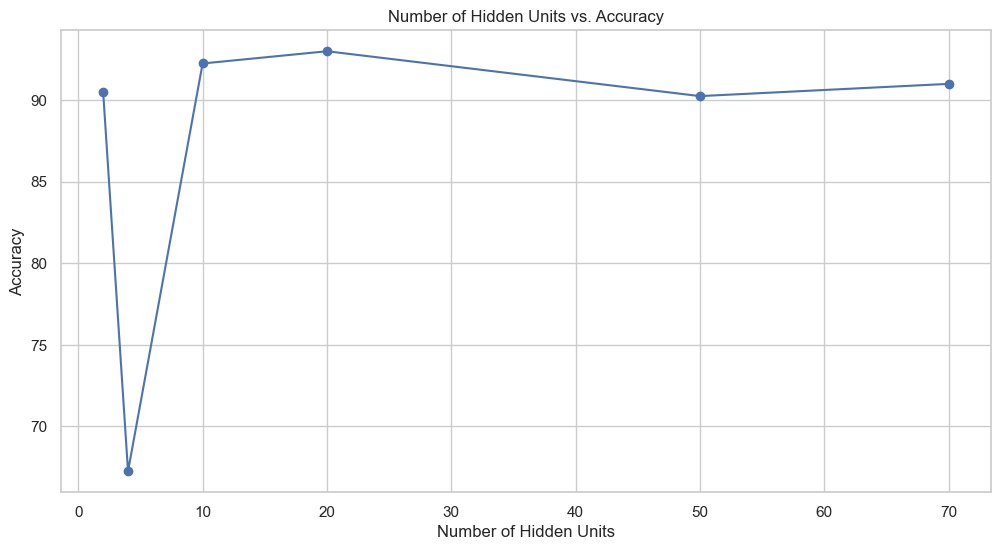

In [102]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(arr_n_h, arr_accuracies, marker='o', color='b')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Number of Hidden Units vs. Accuracy')
plt.show()

### Observation: `Initially from 2-4 hidden layers, the accuracy would substantially increase from 67% to 90%. Afterwards it reaches the minimum cost and any substantial increase in hidden layers(4-10, 10-20, 20-50, 50-70 hidden layers) would not bring any significant change as accuracies would fluctuate between 90% to 94%.`